---
## Homework 12 - Model Validation and Feature Engineeriing 
---


In [ ]:
import numpy as np 
from scipy import stats
import sklearn
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pylab as plt 
import numpy.linalg as npl
%matplotlib inline

### Problem 1:  

**PART A:** Parker has been keeping careful track of how much ice cream he eats after his training runs. He has stored the data in `icecream.csv`, where his ice cream consumption is measured in number of scoops, and his run distances are saved in units of miles. In this exercise you will construct a least squares model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Execute the two cells below to load the data into a Pandas DataFrame.


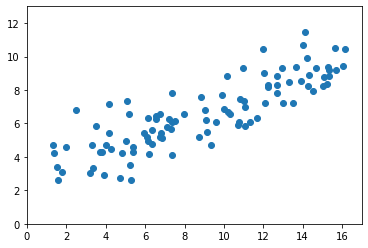

In [ ]:
# file generation code:
np.random.seed(3022)

astar = 3
bstar = 0.4
sigma = 1

n = 100
runs = stats.uniform.rvs(loc=1.2345, scale=15, size=n)
scoops = astar + bstar*runs + stats.norm.rvs(loc=0, scale=sigma, size=n)

plt.scatter(runs, scoops)
plt.xlim([0,17])
plt.ylim([0,13])
plt.show()

dfIce = pd.DataFrame(data={'miles':runs, 'scoops':scoops})
dfIce.to_csv("icecream.csv", index=False)

In [ ]:
dfTreats = pd.read_csv("icecream.csv")
dfTreats.head()

,miles,scoops
0,14.300531,8.922252
1,9.361511,4.720254
2,13.929330,8.567314
3,12.673436,8.855122
4,16.055107,9.409772


**PART B:** Perform a simple linear regression (least squares fit) with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python.

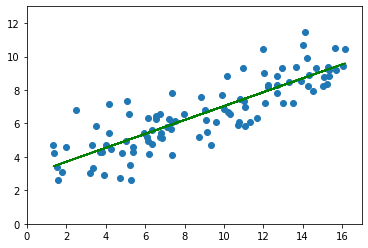

In [ ]:
# Your code here.
n = len(scoops)
btest = np.stack((np.ones(n), runs), axis=1)
test = npl.lstsq(btest, scoops, rcond=None)[0]

plt.plot(runs, btest @ test, color='green')
plt.xlim([0,17])
plt.ylim([0,13])
plt.scatter(runs, scoops)
plt.show()

**PART C:** Compute the RMS error of your model from **PART B**.

In [ ]:
# Your code here.
mse = np.square(np.subtract(scoops,(btest @ test))).mean()

rmse = np.sqrt(mse)
print(rmse)

1.1039598211151245


**PART D:** Use the code cell below to randomly draw a test set. In **Part E**, you will be performing an out-of-sample validation of your model.

In [ ]:
np.random.seed(2820)
data = list(zip(dfTreats["miles"],dfTreats["scoops"]))

np.random.shuffle(data)
training_dataset, test_dataset = sklearn.model_selection.train_test_split(data, train_size=90, test_size=10)

feature_test = []
y_test = []
for ii in range(len(test_dataset)):
    feature_test.append(test_dataset[ii][0])
    y_test.append(test_dataset[ii][1])
    
feature_train = []
y_train = []
for ii in range(len(training_dataset)):
    feature_train.append(training_dataset[ii][0])
    y_train.append(training_dataset[ii][1])
    
test_dict = {"miles":feature_test, "scoops":y_test}
train_dict = {"miles":feature_train, "scoops":y_train}

dfTestSet = pd.DataFrame(data=test_dict)
dfTrainingSet = pd.DataFrame(data=train_dict)

In [ ]:
dfTestSet.head()

,miles,scoops
0,7.368346,7.813114
1,10.000334,6.893307
2,5.098861,7.318355
3,6.137674,6.307874
4,1.577379,2.608175


In [ ]:
dfTrainingSet.head()

,miles,scoops
0,6.327682,5.603935
1,14.257663,8.259234
2,3.181743,3.055331
3,15.088920,8.774816
4,1.771091,3.110615


**PART E:** 
- Use out-of-sample validation to first fit a least squares fit to your training data. Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.


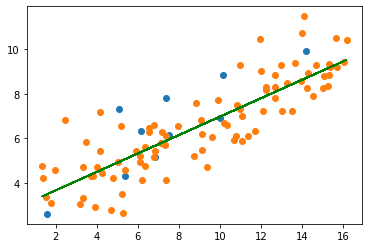

In [ ]:
# Your code here.  
n = len(y_test)
btest = np.stack((np.ones(n), feature_test), axis=1)


l = len(y_train)
b1test = np.stack((np.ones(l), feature_train), axis=1)
test2 = npl.lstsq(b1test, y_train, rcond=None)[0]
plt.plot(feature_train, b1test @ test2, color='green')

plt.scatter(feature_test, y_test)
plt.scatter(feature_train, y_train)
plt.show()

**PART F:** Compute the RMS prediction error for the training data set AND the test data set.
- Compare the RMS values, and comment on whether you think your model is a good model and whether or not you think it has good generalization ability.

In [ ]:
# RMS for test set
mse_train = np.square(np.subtract(y_test,(btest @ test2))).mean()

rmse_train = np.sqrt(mse_train)
print(rmse_train)

1.290648924758721


In [ ]:
# RMS for training set
mse_test = np.square(np.subtract(y_train,(b1test @ test2))).mean()

rmse_test = np.sqrt(mse_test)
print(rmse_test)

1.0832472305342296


### Problem 2:  

**PART A:** A randomized control study was performed with $18$ subjects to investigate the effect of exercise and diet on weight loss.  All $18$ subjects of the study exercised on a daily basis, one third of the subjects ate their regular diet, one third of subjects ate based on Diet $A$, and one third of subjects ate based on Diet $B$.  The observed weight loss after one week is summarized in the following data. 

In [ ]:
dfA = pd.DataFrame({"Control": np.array([4,8,7,5,1,5]),"Diet A": np.array([5,4,4,3,9,4]),"Diet B": np.array([9,8,8,10,5,10])})
dfA.head(10)

,Control,Diet A,Diet B
0,4,5,9
1,8,4,8
2,7,4,8
3,5,3,10
4,1,9,5
5,5,4,10


**PART B:** Using python, set up a design matrix to expand this categorical problem with 3 values using 2 features.

In [ ]:
# Your code here.
dFTest = pd.DataFrame({"test": np.array([4,8,7,5,1,5,5,4,4,3,9,4,9,8,8,10,5,10]), "testA": np.array([0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0]),"testB": np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1]) })
print(dFTest)

    test  testA  testB
0      4      0      0
1      8      0      0
2      7      0      0
3      5      0      0
4      1      0      0
5      5      0      0
6      5      1      0
7      4      1      0
8      4      1      0
9      3      1      0
10     9      1      0
11     4      1      0
12     9      0      1
13     8      0      1
14     8      0      1
15    10      0      1
16     5      0      1
17    10      0      1


**PART C:** Use python to fit a linear regression where the features are binary categorical variables associated with group membership.

In [ ]:
# Your code here.
x = len(dFTest)
aOnes = np.stack((np.ones(x), dFTest["testA"],dFTest["testB"]), axis=1)

linA = npl.lstsq(aOnes, dFTest["test"] , rcond=None)[0]
# linA = npl.lstsq( dFTest["test"], aOnes , rcond=None)[0]
# plt.plot(aOnes @ linA, color='green')

print(linA)

# plt.scatter(dFTest["test"], dFTest["testA"],dFTest["testB"])
# plt.show()

[ 5.         -0.16666667  3.33333333]


**PART D:** Briefly summarize your model. Do you think one diet yields more weightloss than another? Do either of the diets yield a significant amount more weightloss than the control group?

Based on the calculations from part C, Diet B has more weightloss than Diet A and it also has more weight loss than the control group. The control group lost more than those on Diet A as well.